# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


<b>Exercise 2.1</b>

If I were trying to get an evening news story based on these results, I'd pull say that it is more likely for first babies to be born at 30 weeks than second, third, or more babies combined, and nearly a frequency of a thousand less likely to be born 'on time'. I'd leave out the part about fewer first babies than others. I'd also talk about the frequency of babies born late being higher than others. Basically, pull in the outliers!

To reassure a parent, though, I would explain that the mean difference is only 13 hours, that the spread is approximately the same, and that the standard deviation is well within normal. I might mention effect size, but that also might be a bit complicated. Basically, I would stress that it isn't clinically significant.

And now, *ahem*, for my paragraph.

Do first babies arrive late? Well, on average, unless you plan to attend a big event 13 hours after your due hour, there's nothing you need to worry about. That's the difference in mean of first-baby births vs all the rest. This is just 0.029 standard deviations of difference, so considering the difference in heights between men and women is 1.7 standard deviations and births in general have a standard deviation of 2.7 weeks, a few hours is nothing to worry about. However, in general it appears that first babies are a little less likely to be born on time and a little more likely to come either a couple days early or a couple days late, so maybe clear your calendar for a week or so in either direction and save the concert for another night, whichever number baby you're on.

In [4]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [5]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [6]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [7]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [8]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [9]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [10]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [11]:
hist[4]

0

The `Values` method returns the values:

In [12]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [13]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [14]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

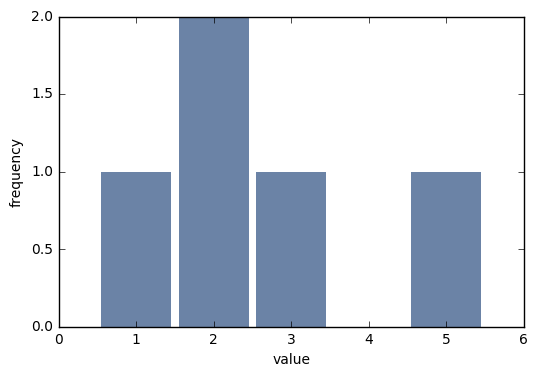

In [15]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [16]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

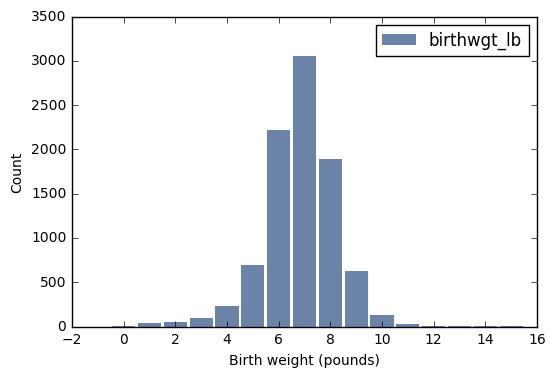

In [17]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [18]:
ages = np.floor(live.agepreg)

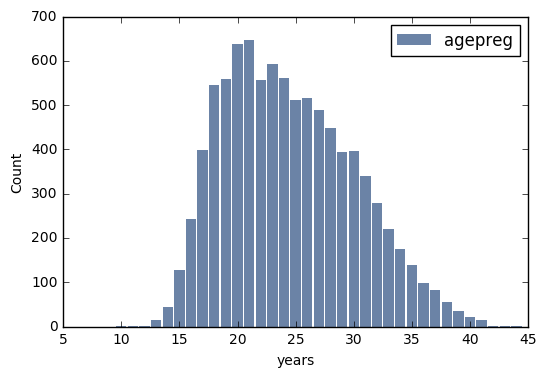

In [19]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

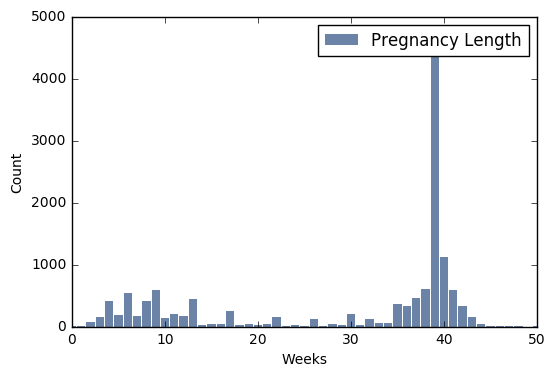

In [20]:
prg_lngth_hist = thinkstats2.Hist(preg.prglngth, label='Pregnancy Length')
thinkplot.Hist(prg_lngth_hist)
thinkplot.Config(xlabel='Weeks', ylabel='Count',xlim=[0, 50])

`Hist` provides smallest, which select the lowest values and their frequencies.

In [21]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


Use `Largest` to display the longest pregnancy lengths.

In [22]:
for weeks, freq in prg_lngth_hist.Largest(5):
    print(weeks,'weeks, Occured', freq, 'times')

50 weeks, Occured 2 times
48 weeks, Occured 7 times
47 weeks, Occured 1 times
46 weeks, Occured 1 times
45 weeks, Occured 10 times


From live births, we can selection first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [23]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

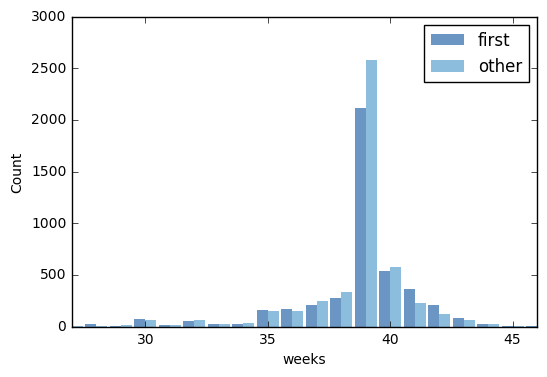

In [24]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [25]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [26]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [27]:
print(var==std*std)

True


Here's are the mean pregnancy lengths for first babies and others:

In [28]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [29]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [30]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [31]:
ces_prglngth = CohenEffectSize(firsts.prglngth, others.prglngth)
print(ces_prglngth)

0.0288790446544


## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [32]:
firsts_weight = firsts.totalwgt_lb
others_weight = others.totalwgt_lb

print(firsts_weight.mean() - others_weight.mean(), 'lb')
print('The mean of firstborn weights is slightly lower.')

-0.12476118453549034 lb
The mean of firstborn weights is slightly lower.


In [33]:
ces_weight = CohenEffectSize(firsts_weight, others_weight)
print(ces_weight)

print('It appears that the weight difference in firstborns is more significant than the pregnancy length.')

-0.0886729270726
It appears that the weight difference in firstborns is more significant than the pregnancy length.


For the next few exercises, we'll load the respondent file:

In [34]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

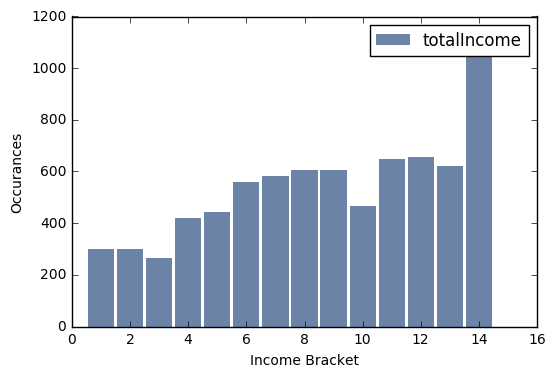

In [35]:
inc_hist = thinkstats2.Hist(resp.totincr, label = 'totalIncome')
thinkplot.Hist(inc_hist)
thinkplot.Config(xlabel="Income Bracket", ylabel="Occurances")

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

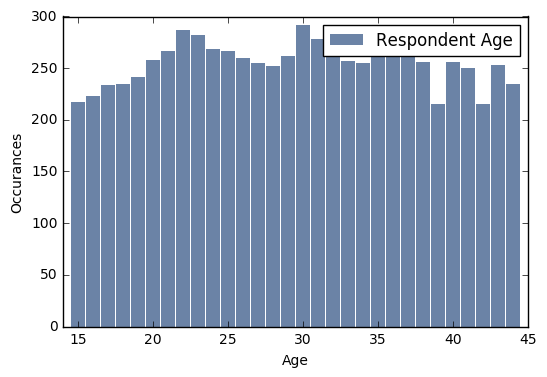

In [36]:
age_hist = thinkstats2.Hist(resp.age_r, label='Respondent Age')
thinkplot.Hist(age_hist)
thinkplot.Config(xlabel='Age', ylabel='Occurances', xlim=[14,45])

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

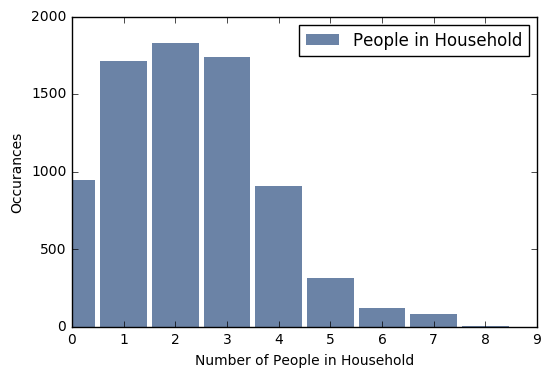

In [37]:
pih_hist = thinkstats2.Hist(resp.numfmhh, label='People in Household')
thinkplot.Hist(pih_hist)
thinkplot.Config(xlabel='Number of People in Household', ylabel='Occurances', xlim=[0,9])

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

This appears to be a distribution skewed towards 0.


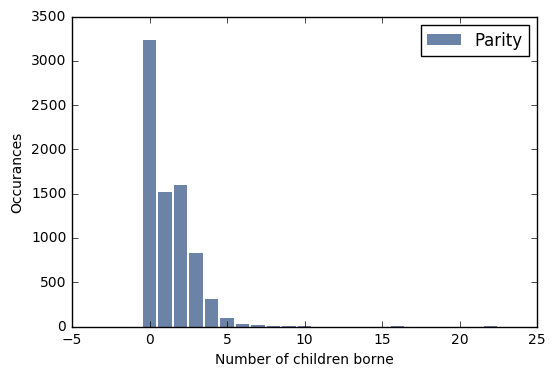

In [38]:
parity_hist = thinkstats2.Hist(resp.parity, label='Parity')
thinkplot.Hist(parity_hist)
thinkplot.Config(xlabel='Number of children borne', ylabel='Occurances')
print('This appears to be a distribution skewed towards 0.')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [39]:
for parity, freq in parity_hist.Largest(5):
    print(parity,'children, Occured', freq, 'times')

22 children, Occured 1 times
16 children, Occured 1 times
10 children, Occured 3 times
9 children, Occured 2 times
8 children, Occured 8 times


Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

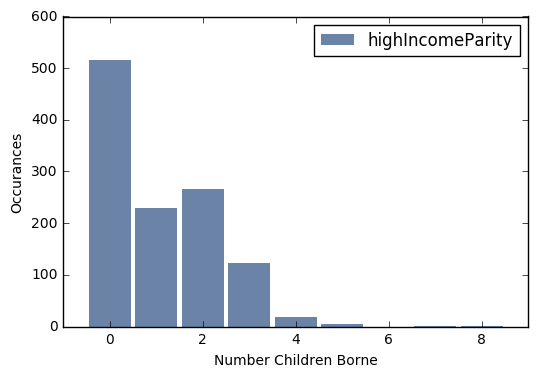

In [40]:
highest_income = resp[resp.totincr == 14]
hinc_par_hist = thinkstats2.Hist(highest_income.parity, label='highIncomeParity')
thinkplot.Hist(hinc_par_hist)
thinkplot.Config(xlabel='Number Children Borne', ylabel='Occurances')

Find the largest parities for high income respondents.

In [41]:
for parity, freq in hinc_par_hist.Largest(5):
    print(parity,'children, occured', freq, 'times')

8 children, occured 1 times
7 children, occured 1 times
5 children, occured 5 times
4 children, occured 19 times
3 children, occured 123 times


Compare the mean <tt>parity</tt> for high income respondents and others.

In [42]:
other_income = resp[resp.totincr!=14]
print('High Income Parity:',highest_income.parity.mean())
print('Lower Income Parity:', other_income.parity.mean())
print('High Income mean parity is', other_income.parity.mean()-highest_income.parity.mean(),'lower')

High Income Parity: 1.0758620689655172
Lower Income Parity: 1.2495758136665125
High Income mean parity is 0.17371374470099532 lower


Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [43]:
ces_parity = CohenEffectSize(highest_income.parity, other_income.parity)
print(ces_parity)
print(abs(ces_parity) - ces_prglngth)
print('This seems to be a more significant difference than pregnancy length.')

-0.125118553147
0.0962395084922
This seems to be a more significant difference than pregnancy length.


<b>Exercise 2

from __future__ import print_function

import sys
from operator import itemgetter

import first
import thinkstats2


def Mode(hist):
    """Returns the value with the highest frequency.

    hist: Hist object

    returns: value from Hist
    """
    freq_list = [(v,k) for k,v in hist.Items()]
    v,k = max(freq_list)
    return k


def AllModes(hist):
    """Returns value-freq pairs in decreasing order of frequency.

    hist: Hist object

    returns: iterator of value-freq pairs
    """
    return sorted(hist.Items(), key=itemgetter(1), reverse=True)


def main(script):
    """Tests the functions in this module.

    script: string script name
    """
    live, firsts, others = first.MakeFrames()
    hist = thinkstats2.Hist(live.prglngth)

    # test Mode    
    mode = Mode(hist)
    print('Mode of preg length', mode)
    assert(mode == 39)

    # test AllModes
    modes = AllModes(hist)
    assert(modes[0][1] == 4693)

    for value, freq in modes[:5]:
        print(value, freq)

    print('%s: All tests passed.' % script)


if __name__ == '__main__':
    main(*sys.argv)
